In [27]:
import pandas as pd
import json
import yfinance as yf
import matplotlib.pyplot as plt

# First we are going to grab some time series data on Bitcoin using yFinance

In [5]:
# YFinance has 4 inputs ('ticker', start, end, interval) we can pre-set start and end
start_date = '2024-01-01'
end_date = '2025-01-01'
interval = '1d'

In [18]:
btc = yf.download('BTC-USD', start_date, end_date, interval=interval)

[*********************100%%**********************]  1 of 1 completed


In [19]:
print(btc.head(3))

                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   

               Adj Close       Volume  
Date                                   
2024-01-01  44167.332031  18426978443  
2024-01-02  44957.968750  39335274536  
2024-01-03  42848.175781  46342323118  


In [20]:
# YFinance automatically convert .download to a dataframe so we dont have to convert this data into a DF

In [21]:
# Now we can start to manipulate this data to find some simple analysis first we will find % return for the day

In [22]:
btc['Daily Return'] = (btc['Close'] - btc['Close'].shift(1))/ btc['Close']

In [23]:
# Lets see if we correctly added the daily return 

In [24]:
print(btc['Daily Return'])

Date
2024-01-01         NaN
2024-01-02    0.017586
2024-01-03   -0.049239
2024-01-04    0.030144
2024-01-05   -0.000390
                ...   
2024-12-27   -0.017317
2024-12-28    0.010498
2024-12-29   -0.017467
2024-12-30   -0.009575
2024-12-31    0.008413
Name: Daily Return, Length: 366, dtype: float64


In [25]:
# We can drop the fact that the first day doesnt have any data
btc.dropna()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536,0.017586
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118,-0.049239
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210,0.030144
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347,-0.000390
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,43989.195312,16092503468,-0.003944
...,...,...,...,...,...,...,...
2024-12-27,95704.976562,97294.843750,93310.742188,94164.859375,94164.859375,52419934565,-0.017317
2024-12-28,94160.187500,95525.898438,94014.289062,95163.929688,95163.929688,24107436185,0.010498
2024-12-29,95174.054688,95174.875000,92881.789062,93530.226562,93530.226562,29635885267,-0.017467


In [31]:
btc.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return'], dtype='object')

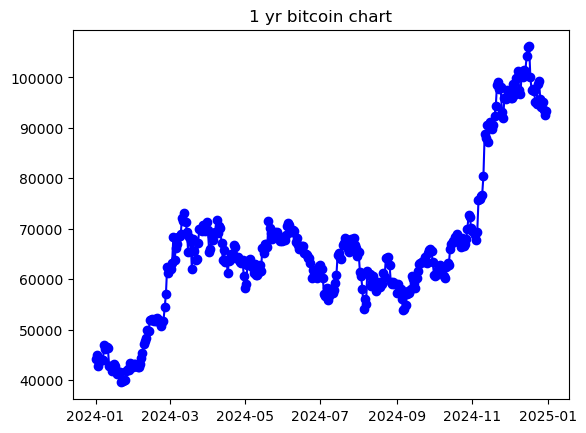

In [32]:
# Lets graph a graph chart of btc returns so, we can find roughly what our data looks like, we can use close
# Plotting goes x-axis, y-axis, style
#plt.plot(btc.index, btc['Close'], marker='o', linestyle='-', color='b')
#plt.title('1 yr bitcoin chart')
#plt.show()


(array([ 0.4123614 ,  1.51199181,  3.16143742,  8.10977425, 18.96862451,
        10.85885026,  5.36069823,  0.687269  ,  0.687269  ,  0.4123614 ]),
 array([-0.09102839, -0.07109642, -0.05116444, -0.03123246, -0.01130048,
         0.00863149,  0.02856347,  0.04849545,  0.06842742,  0.0883594 ,
         0.10829138]),
 <BarContainer object of 10 artists>)

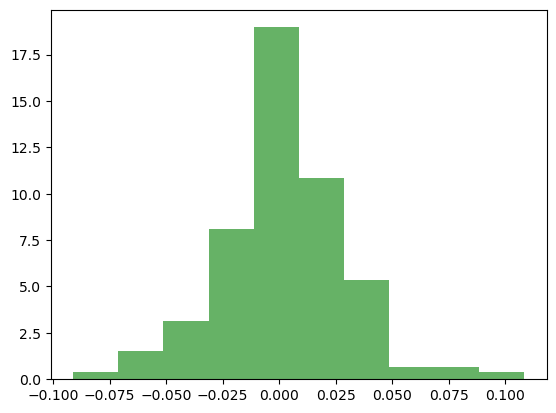

In [34]:
# Now we can plot a historgram chart ... shows us different form of data
plt.hist(btc['Daily Return'], bins=10, density=True, alpha=0.6, color='g')

# We can do other analysis on this type of data including fitting it into a distribution and apply probabilty density
- zscores, etc.
  

### But we will go back into working with the core BTC data ###

In [35]:
btc['pct return'] = btc['Daily Return'].cumsum()

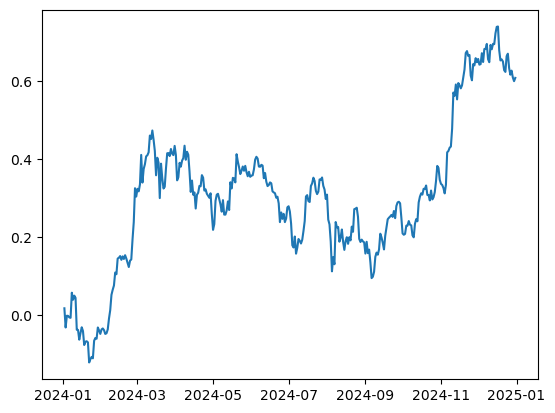

In [36]:
plt.plot(btc['pct return'])

In [38]:
# Lets try now to have a simple back test using simple moving averages adding them as columns

In [42]:
btc['sma_1'] = btc['Close'].rolling(window=10).mean()
btc['sma_2'] = btc['Close'].rolling(window=20).mean()
print(btc.iloc[25])
# we used iloc to look at cell 25 and see if the SMAs work

Open            3.993682e+04
High            4.220939e+04
Low             3.982569e+04
Close           4.181687e+04
Adj Close       4.181687e+04
Volume          2.559812e+10
Daily Return    4.503117e-02
pct return     -6.575316e-02
sma_1           4.100152e+04
sma_2           4.266118e+04
Name: 2024-01-26 00:00:00, dtype: float64


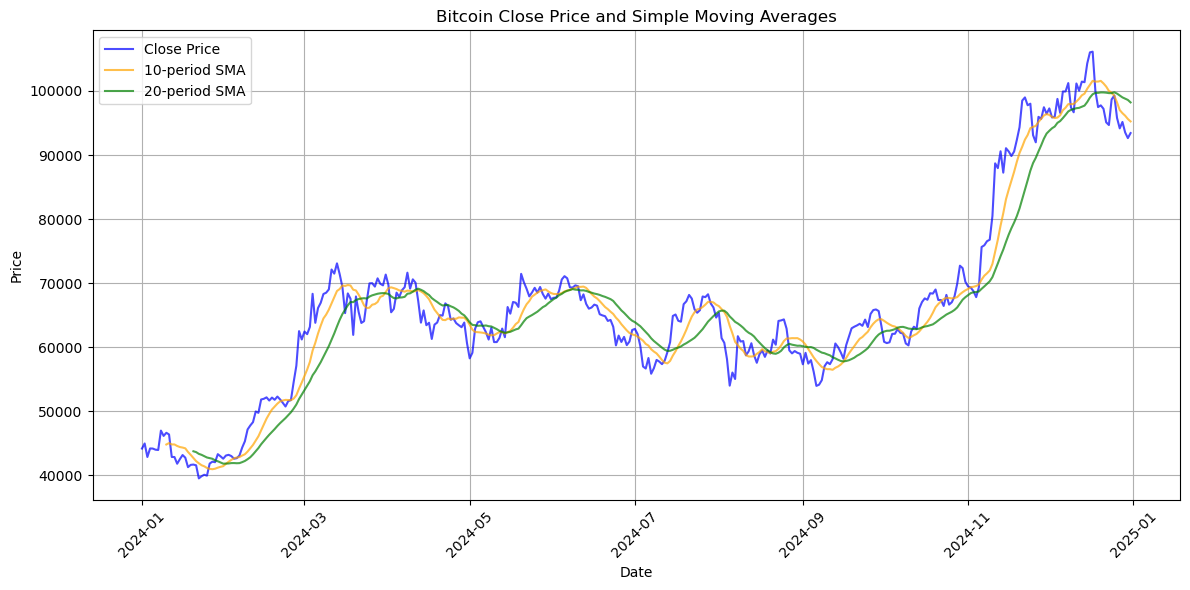

In [43]:
# Check for plotting of these smas and get a visual representation of the data to do this we make 3 plt.plots
plt.figure(figsize=(12, 6))

# Plot the closing price
plt.plot(btc.index, btc['Close'], label='Close Price', color='blue', alpha=0.7)

# Plot sma_1 (10-period)
plt.plot(btc.index, btc['sma_1'], label='10-period SMA', color='orange', alpha=0.7)

# Plot sma_2 (20-period)
plt.plot(btc.index, btc['sma_2'], label='20-period SMA', color='green', alpha=0.7)

# Add titles and labels
plt.title('Bitcoin Close Price and Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
# Now lets make a signal of column and set it to 0
btc['signal'] = 0

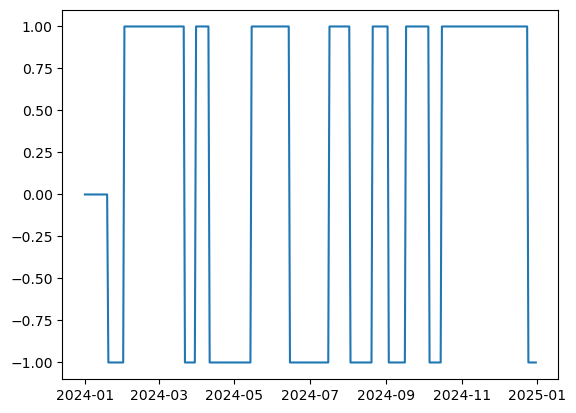

In [65]:
# We want 1 to be buy and -1 to be sell, we will be long when 10 SMA > 20 SMA
btc.loc[btc['sma_1'] > btc['sma_2'], 'signal'] = 1  # Set signal to 1 when sma_1 > sma_2

#Lets graph btc signal to see if it changes
plt.plot(btc['signal'])


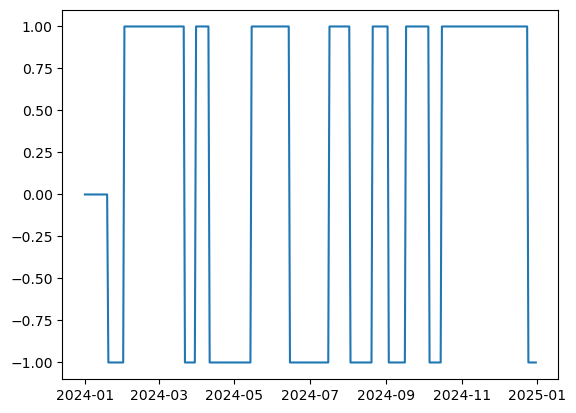

In [47]:
# oops didnt have the short signal so we need to add -1
btc.loc[btc['sma_1'] < btc['sma_2'], 'signal'] = -1  # Set signal to 1 when sma_1 > sma_2

# checking again
plt.plot(btc['signal'])

## Now we will look at backtesting and need to use some looping through the data 

In [49]:
# Compute daily returns for the strategy
btc['strategy_returns'] = btc['signal'].shift(1) * (btc['Close'].pct_change())

In [50]:
# Compute cumulative returns for the strategy
btc['cumulative_strategy_returns'] = (1 + btc['strategy_returns']).cumprod()

In [76]:
btc.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return',
       'pct return', 'sma_1', 'sma_2', 'signal', 'strategy_returns',
       'cumulative_strategy_returns', 'buy_price', 'position',
       'cumulative_buy_and_hold'],
      dtype='object')

In [77]:
btc

,Open,High,Low,Close,Adj Close,Volume,Daily Return,pct return,sma_1,sma_2,signal,strategy_returns,cumulative_strategy_returns,buy_price,position,cumulative_buy_and_hold
Date,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,1.842698e+10,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,0.0,NaN
2024-01-02 00:00:00,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,3.933527e+10,0.017586,0.017586,NaN,NaN,0.0,0.0,1.0,0.000000,0.0,1.017586
2024-01-03 00:00:00,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,4.634232e+10,-0.049239,-0.031653,NaN,NaN,0.0,-0.0,1.0,0.000000,0.0,0.967481
2024-01-04 00:00:00,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,3.044809e+10,0.030144,-0.001509,NaN,NaN,0.0,0.0,1.0,0.000000,0.0,0.996645
2024-01-05 00:00:00,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,3.233603e+10,-0.000390,-0.001899,NaN,NaN,0.0,-0.0,1.0,0.000000,0.0,0.996256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60308.539062,1.0,NaN
279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


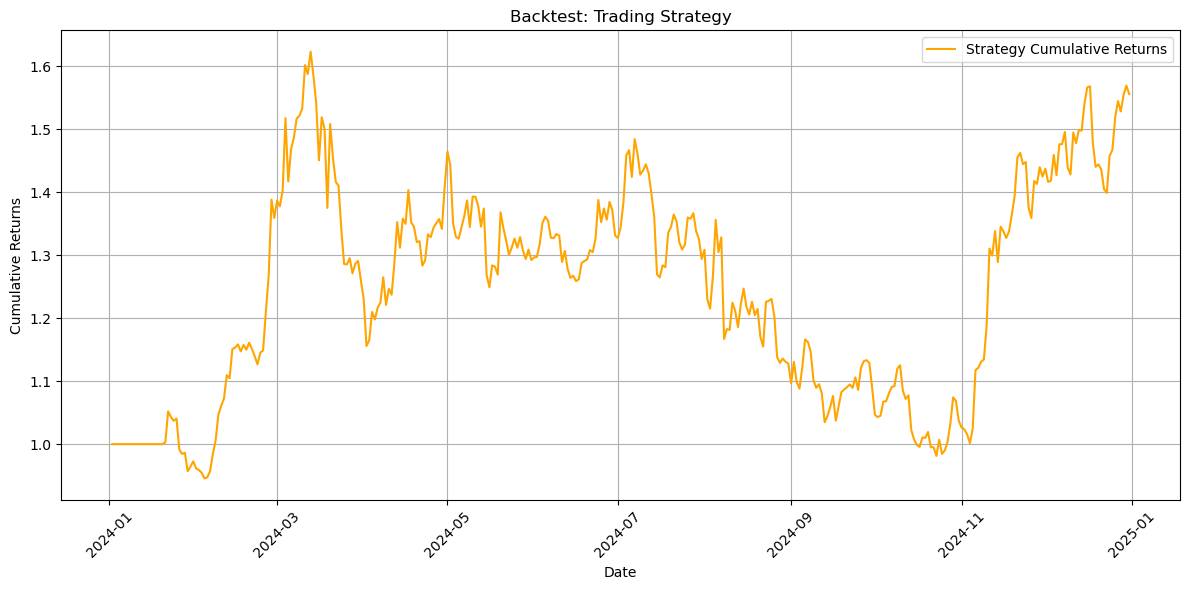

In [53]:
# Plot the strategy 
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['cumulative_strategy_returns'], label='Strategy Cumulative Returns', color='orange')


# Title and labels
plt.title('Backtest: Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

# Rotate x-axis labels and display plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# There are some pretty big drawdowns to the strategy so, let's try to add a stop-loss mechanic
btc['buy_price'] = 0  # Track the buy price for stop-loss
btc['position'] = 0
stop_loss_pct = 0.02  # Stop-loss at 2%

In [57]:
# lets print the data frame before looping into add the stop loss
print(btc.head(10))


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   
2024-01-06  44178.953125  44227.632812  43475.156250  43989.195312   
2024-01-07  43998.464844  44495.570312  43662.230469  43943.097656   
2024-01-08  43948.707031  47218.000000  43244.082031  46970.503906   
2024-01-09  46987.640625  47893.699219  45244.714844  46139.730469   
2024-01-10  46121.539062  47647.222656  44483.152344  46627.777344   

               Adj Close       Volume  Daily Return  pct return         sma_1  \
Date                                                                          

In [66]:
# Track when a position is open
for i in range(1, len(btc)):
    # Buy condition: Signal is 1 (sma_1 > sma_2)
    if btc['signal'].iloc[i] == 1 and btc['signal'].iloc[i-1] == -1:  
        btc.at[i, 'position'] = 1  # Open position
        btc.at[i, 'buy_price'] = btc['Close'].iloc[i]  # Record the buy price
    
    # Stop-loss condition: If position is open and price falls by 2% from the buy price
    elif btc['position'].iloc[i-1] == 1 and (btc['Close'].iloc[i] / btc['buy_price'].iloc[i-1] < (1 - stop_loss_pct)):
        btc.at[i, 'position'] = 0  # Close position (stop-loss triggered)
    
    # Sell condition: Signal is -1 (sma_1 <= sma_2)
    elif btc['signal'].iloc[i] == -1 and btc['signal'].iloc[i-1] == 1:
        btc.at[i, 'position'] = 0  # Close position

In [69]:
print(btc['buy_price']) # we see theres a few buys

Date
2024-01-01 00:00:00        0.000000
2024-01-02 00:00:00        0.000000
2024-01-03 00:00:00        0.000000
2024-01-04 00:00:00        0.000000
2024-01-05 00:00:00        0.000000
                           ...     
246                             NaN
260                    60308.539062
279                             NaN
289                    67612.718750
359                             NaN
Name: buy_price, Length: 381, dtype: float64


In [73]:
btc['strategy_returns'] = btc['position'].shift(1) * (btc['Close'].pct_change(fill_method=None))


# Compute cumulative returns for the strategy
btc['cumulative_strategy_returns'] = (1 + btc['strategy_returns']).cumprod()


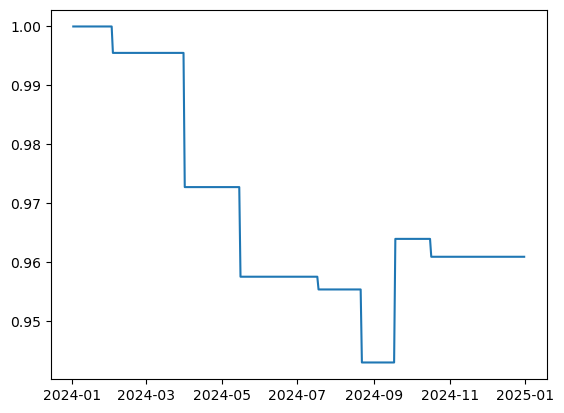

In [74]:
plt.plot(btc['cumulative_strategy_returns'])

In [75]:
# Seems like we messed up with the stop loss but, can check it back later